# Redes Neuronales Convolucionales (CNN by Convolutional Neural Networks)

Las CNN fueron introducidas por Yann LeCun a finales de la década de 1980. LeCun y sus colegas desarrollaron la primera CNN, conocida como [LeNet-5](https://www.educative.io/blog/lenet-5#Layers-in-LeNet-architecture), su misión era revolucionar el reconocimiento de caracteres escritos a mano, especialmente en la banca, donde el procesamiento de cheques era una tarea laboriosa. Gracias a LeNet-5, la precisión de la lectura de la escritura a mano aumentó y el número de errores disminuyó. Este gran cambio tuvo un gran impacto en el funcionamiento de los bancos, y los cambió para siempre. La versatilidad de LeNet-5 se extendió a todas las industrias, automatizando tareas desde el reconocimiento de direcciones hasta la digitalización de documentos.

<img src="images/CNN/yann_pic.jpeg" alt="Yann LeCun" width="250">

El trabajo de LeCun y su equipo innovó el procesamiento de imágenes con la introducción de capas **convolucionales**, capas de **agrupamiento** (pooling) y la **arquitectura jerárquica** de las CNN. Su labor pionera sentó las bases para los sistemas modernos de aprendizaje profundo y reconocimiento de imágenes.

## 1. Conceptos básicos (Repaso)

### 1.1 Neuronas y capas

#### 1.1.1 Neurona
Es la unidad básica que recibe entradas, procesa esas entradas y produce una salida. Cada neurona tiene varios componentes:

* Entradas: Las neuronas reciben información a través de sus entradas, que pueden ser características de los datos (por ejemplo, píxeles de una imagen o características numéricas en un conjunto de datos).

* Pesos: Cada entrada está asociada a un peso, que determina la importancia de esa entrada en la decisión final de la neurona. Un peso alto significa que la entrada tiene una influencia significativa en la salida.

* Función de activación: Una vez que se suman todas las entradas ponderadas (con sus respectivos pesos), se aplica una función de activación a la suma. Esta función introduce no linealidad en el modelo y ayuda a la red a aprender relaciones complejas. Algunas funciones de activación comunes son:

    * Sigmoide: Produce una salida entre 0 y 1, útil para problemas de clasificación binaria.
    * Tanh: Produce una salida entre -1 y 1, centrada en cero.
    * ReLU (Rectified Linear Unit): Produce cero para entradas negativas y pasa la entrada sin cambios para entradas positivas, lo que ayuda a evitar el problema del desvanecimiento del gradiente.

* Salida: La salida de la neurona es el resultado de aplicar la función de activación a la suma ponderada de las entradas.

#### 1.1.2 Capas
Las neuronas se organizan en capas dentro de la red neuronal. Las capas comunes son:

* Capa de entrada: La primera capa de la red, que recibe los datos de entrada. Cada neurona en esta capa representa una característica de los datos de entrada.

* Capas ocultas: Capas intermedias entre la entrada y la salida. Estas capas permiten a la red aprender representaciones complejas de los datos. Cada neurona en una capa oculta toma entradas de la capa anterior y produce salidas para la siguiente capa.

* Capa de salida: La última capa de la red, que produce las predicciones finales. En problemas de clasificación, el número de neuronas en esta capa es igual al número de clases posibles.


<img src="images/CNN/perceptron.png" alt="Conceptos básicos" width="500">


### 1.2 Red de alimentación hacia adelante (feedforward)
En una red de alimentación hacia adelante (feedforward), la información fluye en una única dirección: desde la capa de entrada, a través de las capas ocultas, hasta la capa de salida. Este proceso implica los siguientes pasos:

* Entrada de datos: Los datos de entrada se presentan a la capa de entrada.

* Cálculo en capas ocultas: Las entradas se pasan a las neuronas en la primera capa oculta. Cada neurona calcula su salida mediante la suma ponderada de sus entradas y la aplicación de la función de activación. Esta salida se envía a las neuronas de la siguiente capa.

* Repetición: Este proceso se repite a través de todas las capas ocultas. Cada capa procesa la información y la pasa a la siguiente capa.

* Capa de salida: Finalmente, la capa de salida produce la predicción final de la red. Dependiendo del problema, se puede aplicar una función de activación específica en esta capa (por ejemplo, softmax para clasificación múltiple).





### 1.3 Pesos y sesgos
Los pesos y sesgos son los parámetros ajustables de la red que determinan cómo la red mapea las entradas a las salidas.

#### 1.3.1 Pesos
Cada conexión entre neuronas tiene un peso asociado. Los pesos se inicializan aleatoriamente al comienzo del entrenamiento y se ajustan durante el proceso de aprendizaje. Un peso positivo indica que la entrada aumenta la activación de la neurona, mientras que un peso negativo indica lo contrario.

#### 1.3.2 Sesgos
Cada neurona también tiene un sesgo, que es un valor adicional que se suma a la entrada ponderada antes de aplicar la función de activación. El sesgo permite a la red hacer ajustes en la salida independientemente de las entradas, lo que es útil para mejorar el rendimiento del modelo.

### 1.4 Retropropagación
La retropropagación es el algoritmo utilizado para ajustar los pesos y sesgos de la red. Funciona de la siguiente manera:

* Cálculo de la pérdida: Después de realizar la predicción, se calcula la pérdida utilizando una función de pérdida que mide la discrepancia entre las predicciones de la red y las etiquetas verdaderas. Por ejemplo, en clasificación, se puede usar la pérdida de entropía cruzada.

* Cálculo de los gradientes: Se calcula el gradiente de la función de pérdida con respecto a los pesos y sesgos de la red. Esto se hace utilizando la regla de la cadena, que permite calcular cómo cambios pequeños en los pesos y sesgos afectan la pérdida total.

* Actualización de parámetros: Los pesos y sesgos se actualizan utilizando una técnica de optimización, como el Descenso por Gradiente ($w_{\text{nuevo}} = w_{\text{viejo}} - \alpha \cdot \frac{\partial L}{\partial w}$ donde $w$ es el peso, $\alpha$ es la tasa de aprendizaje y $L$ es la función de pérdida).

* Repetición: Este proceso se repite para cada ejemplo en el conjunto de datos, y se realizan múltiples iteraciones (épocas) para permitir que la red aprenda patrones en los datos.

## 2. El problema del reconocimiento de imágenes

### 2.1 Motivación para la creación de las CNNs

El reconocimiento de imágenes plantea varios desafíos para las redes neuronales tradicionales (totalmente conectadas), entre los que destacan la alta dimensionalidad de las imágenes y la necesidad de invarianza ante traslaciones. Estos problemas llevaron a la creación de las redes neuronales convolucionales (CNNs), que abordan estas limitaciones de manera eficiente.

#### 1. Alta Dimensionalidad de las Imágenes
   
Una imagen digital es una matriz de píxeles. Una imagen a color típica de tamaño modesto (por ejemplo, 128x128 píxeles) contiene 16,384 píxeles por canal de color, y para imágenes RGB hay tres canales (rojo, verde y azul). Esto lleva a un total de 49,152 entradas en la red neuronal.

En una red totalmente conectada (fully connected), cada neurona de una capa está conectada a todas las neuronas de la capa anterior. Este esquema presenta problemas cuando las imágenes de alta resolución son las entradas. Por ejemplo, si usamos una red neuronal tradicional para una imagen de 128x128 píxeles, el número de conexiones (pesos) sería inmanejable:

* Número de parámetros: Si tenemos solo una capa oculta con 1,000 neuronas y la imagen tiene 128x128 píxeles en 3 canales, tendríamos 49,152 entradas conectadas a 1,000 neuronas, lo que implica 49,152,000 pesos solo para una capa oculta. Este número aumenta drásticamente con más capas o con imágenes de mayor resolución, lo que hace la red extremadamente difícil de entrenar y propensa al sobreajuste.

Esto significa que una red totalmente conectada:

* Es computacionalmente muy costosa debido al gran número de parámetros.
* Requiere enormes cantidades de memoria y potencia de procesamiento.
* Tiene un alto riesgo de sobreajuste, ya que con tantos parámetros es fácil que la red memorice los datos en lugar de generalizar patrones.
 
Para una imagen muy pequeña (32x32), una red neuronal totalmente conectada ya requiere más de 130,000 parámetros. En comparación, una CNN utiliza filtros pequeños que comparten pesos a lo largo de la imagen, lo que reduce drásticamente la cantidad de parámetros y permite que la red sea mucho más eficiente.


#### 2. Necesidad de Invarianza ante Traslaciones (Translation Invariance)

<img src="images/CNN/invarianza_tra.png" alt="Translation Invariance" width="250">

Otro desafío importante al procesar imágenes es que los objetos pueden aparecer en diferentes posiciones dentro de la imagen. En una red totalmente conectada, cada neurona está conectada a un píxel específico de la imagen. Esto significa que si un objeto cambia de posición en la imagen, la red no reconocerá el objeto correctamente.

Por ejemplo, si un gato aparece en la esquina superior izquierda de una imagen durante el entrenamiento y luego en la esquina inferior derecha durante la prueba, una red neuronal totalmente conectada no podría reconocer que es el mismo objeto, porque la estructura de conexiones depende de la posición exacta de cada píxel.

En el mundo real, necesitamos que las redes sean invariantes a traslaciones, es decir, que puedan reconocer objetos independientemente de dónde aparezcan en la imagen. Las CNNs logran esto al aprender filtros locales que pueden detectar características en cualquier lugar de la imagen.

## 3. Arquitectura de las Redes Neuronales Convolucionales (CNNs)

### 3.1 Capa convolucional:
#### 3.1.1 ¿Qué es la Convolución?
La convolución es el núcleo de las CNNs. Es una operación matemática que consiste en aplicar un filtro (o kernel) sobre una imagen para extraer características relevantes, como bordes, texturas o formas. 
En una CNN, este filtro es una matriz pequeña (por ejemplo, 3x3, 5x5 o 7x7) que se desliza sobre la imagen de entrada. En cada posición, el filtro calcula un valor basado en la multiplicación de sus pesos con los valores de los píxeles en la imagen. Este valor se almacena en una nueva representación matricial, llamada mapa de características.

Formalmente, para una imagen de entrada $I(x,y)$ y un filtro $F(x,y)$, la convolución se define como:

$(I * F)(x, y) = \sum_{i=-k}^{k} \sum_{j=-k}^{k} I(x+i, y+j) \cdot F(i, j)$

donde:

* $(x,y)$ es la coordenada en la imagen donde se está aplicando el filtro.
* $I(x+i,y+j)$ es el valor del píxel en la imagen en la posición desplazada por $i$ y $j$.
* $F(i,j)$ es el valor del filtro o kernel en la posición $(i,j)$.
* $2k+1$ es el tamaño del filtro (por ejemplo, un filtro $3×3$ tiene $k=1$, y se desliza sobre la imagen).

Para cada posición $(x,y)$ en la imagen de entrada $I$, el filtro $F$ se alinea con una pequeña región de la imagen (normalmente del mismo tamaño que el filtro) y se realiza un producto punto entre los valores del filtro y los valores de los píxeles en esa región de la imagen. El resultado de la suma de estos productos se asigna a una nueva matriz de salida (conocida como mapa de características).

Entonces las entradas del mapa de características se calculan con la formlua siguiente:

$S(x,y) = \sum_{i=1}^{m} \sum_{j=1}^{n} I(x+i, y+j) \cdot F(i, j)$

Donde el filtro $F$ se aplica a cada punto $I(x,y)$ de la imagen.

#### Ejemplo
Si tenemos una imagen $I$ de tamaño 5×5 y un filtro $F$ de tamaño 3×3, la operación de convolución implica tomar la matriz 3×3 del filtro y deslizarla sobre la imagen, multiplicando y sumando valores en cada región como se muestra a continuación.

$I = \begin{bmatrix}
1 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 & 1
\end{bmatrix}$

$F = \begin{bmatrix}
1 & 0 & -1 \\
1 & 0 & -1 \\
1 & 0 & -1
\end{bmatrix}$

En la primera posición de la imagen, el filtro cubre los primeros 3×3 píxeles:
$S(1,1)=(1×1)+(1×0)+(1×−1)+(0×1)+(1×0)+(1×−1)+(0×1)+(0×0)+(1×−1)$

$S(1,1)=1+0−1+0+0−1+0+0−1=−2$

Este valor se coloca en la posición (1,1) de la nueva matriz resultante (mapa de características).
Al finalizar el proceso se obtiene el mapa de características de tamaño 3x3 

$Mapa\ de\ caracteristicas = \begin{bmatrix}
-2 & 1 & 0 \\
-1 & 1 & 1 \\
0 & 1 & 2
\end{bmatrix}$


#### 3.1.2 Mapas de Características
La matriz resultante de aplicar un filtro a una imagen es conocido como **mapa de características** o **feature map**. Cada mapa de características resalta una propiedad específica de la imagen, como bordes horizontales, verticales, texturas, etc. Las primeras capas convolucionales tienden a aprender características básicas, mientras que las capas más profundas aprenden características más complejas, como formas y patrones completos.

#### 3.1.3 Desplazamiento del Filtro
A medida que el filtro se desliza (o convoluciona) sobre la imagen, se aplican los mismos pesos en cada posición. Esto genera una propiedad importante: compartición de pesos, lo que significa que el filtro aprende a detectar una característica específica en cualquier parte de la imagen, no solo en una ubicación fija.

Conceptos adicionales:
* Padding: Añadir ceros alrededor de la imagen para controlar el tamaño de salida y mejorar el procesamiento de bordes.
* Stride: Define cuántos píxeles el filtro se mueve sobre la imagen, afectando el tamaño del mapa de características resultante.

Para que un filtro sea útil en el contexto de las redes neuronales convolucionales (CNNs), debe cumplir con ciertas propiedades que lo hagan eficaz para extraer características de las imágenes. Las propiedades más importantes son las siguientes:

1. Tamaño Pequeño
Los filtros generalmente son pequeños, como 3×3, 5×5, o 7×7, para capturar patrones locales en la imagen. Un filtro más pequeño reduce la cantidad de parámetros que se deben aprender, lo que hace el entrenamiento más eficiente. Aunque los filtros pequeños no pueden capturar patrones globales de una imagen, las capas sucesivas de la red pueden aprender representaciones más abstractas y complejas.

2. Compartición de Pesos (Weight Sharing)
El filtro debe poder aplicarse en cualquier parte de la imagen, lo que significa que los mismos pesos se aplican a diferentes regiones de la imagen. Esta propiedad permite a la red aprender características generales, como bordes, texturas y formas, que son relevantes en cualquier parte de la imagen.

3. Profundidad (Depth) del Filtro
En imágenes en color (RGB), el filtro debe tener una profundidad que coincida con los canales de la imagen. Por ejemplo, si una imagen tiene 3 canales (rojo, verde y azul), el filtro también debe tener una profundidad de 3 para que pueda operar en todos los canales de la imagen simultáneamente. Para una imagen de entrada con forma 32×32×3, el filtro podría tener forma 3×3×3.

4. Valores Iniciales Aleatorios (Random Initialization)
Los valores del filtro (los pesos) se inicializan de manera aleatoria al principio del entrenamiento, y luego se ajustan durante el proceso de backpropagation (aplicado a cada entrada) a medida que la red aprende a extraer características útiles. Estos valores son números pequeños, y la inicialización correcta es importante para evitar problemas como el desvanecimiento o explosión del gradiente.

5. Estructura de la Matriz del Filtro
En términos de su estructura interna, los filtros no tienen restricciones específicas en cuanto a los valores individuales de la matriz, pero ciertos tipos de filtros se especializan en detectar características específicas:

* Filtros de detección de bordes: Estos filtros tienden a tener valores que resalten los cambios bruscos en la intensidad de la imagen, como los bordes. Ejemplos incluyen los filtros de Sobel o de Laplaciano, que son comunes en procesamiento de imágenes.
* Filtros suavizadores: Se utilizan para desenfocar o eliminar el ruido de la imagen, típicamente contienen valores que suavizan las transiciones en la imagen.
* Filtros de detección de patrones: Los filtros en capas más profundas tienden a aprender patrones más complejos, como texturas o formas geométricas.

6. Invarianza ante Escala y Rotación (Opcional)
Aunque las CNNs no son naturalmente invariante a la escala o rotación, en algunos casos se utilizan filtros que tienen estas propiedades. Para tener invarianza a la escala, algunos enfoques implican el uso de redes convolucionales a diferentes resoluciones o tamaños de filtro, pero esto se logra generalmente en el diseño de la arquitectura de la red en lugar de en la definición del filtro en sí.

Ejemplo de Filtros Comunes (Sobel):

Filtro de detección de bordes horizontal:
$Filtro\ horizontal = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$
 
Filtro de detección de bordes vertical:
$Filtro\ vertical = \begin{bmatrix}
-1 & -2 & -1 \\
0 & 0 & 0 \\
1 & 2 & 1
\end{bmatrix}$
 
Los filtros en CNNs son fundamentales para extraer características locales de las imágenes, y para ser eficaces, deben ser pequeños, tener compartición de pesos, tener una profundidad adecuada, y ser diferenciables, entre otras propiedades.

# Ejercicio. 
Calcular las entradas $S(3,2), S(3,3), S(4,2), S(4,3), S(6,1), S(6,2), S(6,3), S(6,4)$ del mapa de características

Imagen:

<img src="images/CNN/smiley_matrix.png" alt="Ejercicio Smiley" width="500">

Filtro de Sobel de detección de bordes horizontal:
$F = \begin{bmatrix}
-1 & 0 & 1 \\
-2 & 0 & 2 \\
-1 & 0 & 1
\end{bmatrix}$

### 3.2 Función de activación:
Después de aplicar la convolución, se usa una función de activación no lineal para introducir complejidad en el modelo. La función más común es la ReLU (Rectified Linear Unit), definida como:

$f(x) = \max(0, x)$

#### 3.2.1 ¿Por qué usar ReLU?
La función ReLU tiene varias ventajas:

* No linealidad: Sin la no linealidad de ReLU, la red solo podría aprender relaciones lineales, lo que limitaría su capacidad para modelar patrones complejos.
* Eficiencia: ReLU es computacionalmente barata, ya que solo aplica una comparación simple en cada valor.
* Prevención de gradientes vanishing: A diferencia de las funciones sigmoide o tangente hiperbólica, ReLU reduce el problema de los gradientes vanishing, permitiendo que los modelos profundos se entrenen de manera más eficiente.

### 3.3 Capa de agrupamiento (pooling):
La operación de pooling se utiliza para reducir la dimensionalidad de los mapas de características, manteniendo las características más importantes. Esto hace que la red sea más eficiente y robusta frente a pequeñas traslaciones o distorsiones en la imagen de entrada.

#### 3.3.1 Max Pooling
La técnica más común es el max pooling, donde se toma el valor máximo de un bloque de píxeles. Por ejemplo, si se aplica un max pooling de 2x2, se divide el mapa de características en bloques de 2x2 y se toma el valor más alto de cada bloque.
Ejemplo: Si tenemos un bloque de píxeles:

$\begin{bmatrix}
1 & 3 \\
2 & 5
\end{bmatrix}$

El resultado del max pooling sería 5, ya que es el valor más alto en el bloque.

**Otro ejemplo chiquito de max pooling**

<img src="images/CNN/pooling.jpeg" alt="Pooling" width="500">

El agrupamiento reduce el tamaño de los mapas de características y hace que la red sea menos sensible a pequeñas traslaciones.

#### 3.3.2 Ventajas del Pooling
* Reducción de dimensionalidad: Al reducir el tamaño de los mapas de características, se disminuye la cantidad de datos que la red necesita procesar, lo que mejora la eficiencia.
* Invarianza a traslaciones: El pooling introduce una tolerancia a pequeños cambios de posición en la imagen. Si un objeto en una imagen cambia ligeramente de lugar, el max pooling aún puede capturar su presencia al mantener las características clave.

# Ejercicio. 
Aplicar el método de max pooling a la submatriz de tamaño $2x2$ obtenida en el ejercicio anterior del mapa de características.

### A continuación se ilustran los dos pasos descritos anteriormente (convolución y pooling)

<img src="images/CNN/Schematic-representation-of-a-convolution-and-pooling-layer-in-a-CNN.png" alt="Pooling" width="500">

### 3.4 Capa totalmente conectada
Una vez que la red ha pasado por varias capas convolucionales y de pooling, las características extraídas son pasadas a una o más capas totalmente conectadas (o densas). Estas capas son responsables de la clasificación o regresión final.

#### 3.4.1 Salida
En la última capa, que suele ser totalmente conectada, se utiliza una función de activación suave, como softmax para problemas de clasificación. Softmax convierte los valores de salida en probabilidades:

$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}$

Donde $z_i$  es la salida de la $i$-ésima neurona, y la suma de las probabilidades para todas las clases es igual a 1.


### En resumen

1. Imagen de Entrada: La imagen entra a la red como una matriz de píxeles (por ejemplo, 32x32x3 para imágenes RGB).
2. Capas Convolucionales: Se aplican varios filtros (por ejemplo, 3x3) que crean mapas de características. Cada capa convolucional extrae características cada vez más abstractas de la imagen.
3. Función ReLU: Después de cada convolución, se aplica ReLU para introducir no linealidad y mejorar la capacidad de aprendizaje.
4. Pooling: Después de la convolución, se aplica pooling (como max pooling) para reducir la dimensionalidad de los mapas de características.
5. Capa Totalmente Conectada: Después de varias capas convolucionales y de pooling, las características extraídas se aplanan y se pasan a capas totalmente conectadas.
6. Salida: La última capa de la red hace la predicción final (por ejemplo, clasificar la imagen en una de varias categorías).

<img src="images/CNN/Le_Net.png" alt="Pooling" width="800">

# Ejemplo de una CNN sencilla

In [28]:
# Definición de una red neuronal convolucional sencilla

import numpy as np

class SimpleCNN:
    def __init__(self, input_shape, num_classes, filter_size, num_filters, pool_size):
        # Inicializamos la estructura de la CNN
        self.input_shape = input_shape  # Dimensiones de entrada (altura, ancho, canales)
        self.num_classes = num_classes  # Número de clases de salida
        self.filter_size = filter_size    # Tamaño del filtro (por ejemplo 3x3x1)
        self.num_filters = num_filters     # Número de filtros
        self.pool_size = pool_size         # Tamaño de la ventana de pooling

        # Inicializamos los filtros de la capa convolucional
        """
        num_filters: Número de filtros de la capa convolucional.
        filter_size: Tamaño de cada filtro (asumido cuadrado en este caso).
        input_shape[2]: Número de canales de entrada. Imágenes en escala de grises será 1; imágenes RGB, será 3.
        """
        self.filters = np.random.randn(num_filters, filter_size, filter_size, input_shape[2]) * 0.1

        # Calculamos el tamaño de la salida después de la convolución y pooling
        """
        input_shape[0]: Altura de la imagen (en píxeles).
        input_shape[1]: Ancho de la imagen (en píxeles).
        pool_size: Determina cuántos píxeles se agrupan juntos.
        num_filters: Número de filtros de la capa.
        """
        conv_output_size = (input_shape[0] - filter_size + 1) // pool_size * (input_shape[1] - filter_size + 1) // pool_size * num_filters
        # Inicializamos los pesos de la capa totalmente conectada
        self.fc_weights = np.random.randn(conv_output_size, num_classes) * 0.1 # Se inicializan aleatoriamente

    def conv_layer(self, input): # Capa convolucional
        # Aplicamos la operación de convolución
        self.last_input = input
        filter_height, filter_width = self.filter_size, self.filter_size
        output_height = input.shape[0] - filter_height + 1
        output_width = input.shape[1] - filter_width + 1
        output = np.zeros((output_height, output_width, self.num_filters))
        
        for f in range(self.num_filters):
            for i in range(output_height):
                for j in range(output_width):
                    region = input[i:i + filter_height, j:j + filter_width]
                    output[i, j, f] = np.sum(region * self.filters[f])
        
        return output

    def relu(self, input):
        # Aplicamos la función de activación ReLU
        return np.maximum(0, input)

    def pooling(self, input):
        # Aplicamos la operación de pooling (max pooling)
        pool_height, pool_width = self.pool_size, self.pool_size
        output_height = input.shape[0] // pool_height
        output_width = input.shape[1] // pool_width
        output = np.zeros((output_height, output_width, input.shape[2]))

        for f in range(input.shape[2]):
            for i in range(output_height):
                for j in range(output_width):
                    region = input[i*pool_height:(i+1)*pool_height, j*pool_width:(j+1)*pool_width, f]
                    output[i, j, f] = np.max(region)
        
        return output

    def flatten(self, input):
        # Aplanamos la salida para pasar a la capa totalmente conectada
        return input.flatten()

    def fc_layer(self, input):
        # Aplicamos la capa totalmente conectada
        return np.dot(input, self.fc_weights)

    def softmax(self, input):
        # Aplicamos la función softmax para obtener probabilidades
        exp_values = np.exp(input - np.max(input))  # Evita desbordamiento
        return exp_values / exp_values.sum(axis=0)

    def forward(self, input):
        # Pasamos los datos a través de la red
        conv_output = self.conv_layer(input)
        relu_output = self.relu(conv_output)
        pooled_output = self.pooling(relu_output)
        flattened_output = self.flatten(pooled_output)
        fc_output = self.fc_layer(flattened_output)
        probabilities = self.softmax(fc_output)
        return probabilities

    def fit(self, X_train, y_train, epochs=10, lr=0.01):
        # Método de entrenamiento (simplificado, sin backpropagation)
        for epoch in range(epochs):
            for x, y in zip(X_train, y_train):
                # Realizamos una pasada hacia adelante
                probabilities = self.forward(x)
                # Aquí debería ir el código para la retropropagación
                # Pero lo dejamos simplificado en este ejemplo
                # Se calcularían los gradientes y se actualizarían los pesos
            print(f'Epoch {epoch + 1}/{epochs} complete.')

    def predict(self, x):
        # Realizamos la predicción para una entrada
        probabilities = self.forward(x)
        return np.argmax(probabilities)

Epoch 1/5 complete.
Epoch 2/5 complete.
Epoch 3/5 complete.
Epoch 4/5 complete.
Epoch 5/5 complete.
Predicción de la clase: 3


In [29]:
# Ejemplo de uso
if __name__ == "__main__":
    # Simulamos una imagen de 28x28 con 1 canal
    input_shape = (28, 28, 1)
    num_classes = 10
    filter_size = 3
    num_filters = 8
    pool_size = 2

    cnn = SimpleCNN(input_shape, num_classes, filter_size, num_filters, pool_size)

    # Simulamos 100 imágenes de entrenamiento y sus etiquetas
    X_train = np.random.rand(100, 28, 28, 1)
    y_train = np.random.randint(0, 10, size=100)

    # Entrenamos la CNN
    cnn.fit(X_train, y_train, epochs=5, lr=0.001)

    # Realizamos una predicción sobre una nueva imagen
    test_image = np.random.rand(28, 28, 1)  # Imagen de prueba
    predicted_class = cnn.predict(test_image)
    print(f'Predicción de la clase: {predicted_class}')


Epoch 1/5 complete.
Epoch 2/5 complete.
Epoch 3/5 complete.
Epoch 4/5 complete.
Epoch 5/5 complete.
Predicción de la clase: 3


# LeNet-5

Comenzamos importando las bibliotecas necesarias, como NumPy, Matplotlib para la visualización, scikit-learn para las métricas y TensorFlow para crear y entrenar el modelo de red neuronal.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

2024-10-16 13:48:27.940686: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-16 13:48:27.979645: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-16 13:48:28.614845: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Carga y preprocesamiento del conjunto de datos MNIST
Cargamos el conjunto de datos MNIST (Modified National Institute of Standards and Technology) utilizando el módulo integrado de TensorFlow. El conjunto de datos se divide en conjuntos de entrenamiento, validación y prueba. Preprocesamos los datos remodelándolos en el formato requerido y normalizando los valores de píxel para que estén dentro del rango datasets $[0,1]$.

<img src="images/CNN/mnist_sample.png" alt="Muestra del dataset mnist" width="500">

In [2]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Split the data into train, validation, and test sets
validation_split = 0.1
validation_size = int(len(train_images) * validation_split)

validation_images = train_images[:validation_size]
validation_labels = train_labels[:validation_size]
train_images = train_images[validation_size:]
train_labels = train_labels[validation_size:]

# Further preprocessing
train_images = train_images.reshape((len(train_images), 28, 28, 1)).astype('float32') / 255
validation_images = validation_images.reshape((len(validation_images), 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((len(test_images), 28, 28, 1)).astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [8]:
train_images.shape, test_images.shape

((54000, 28, 28, 1), (10000, 28, 28, 1))

## Construyendo el modelo LeNet-5
La arquitectura del modelo LeNet-5 se construye utilizando la API Keras de TensorFlow. Consta de capas convolucionales con función de activación ReLU, capas de agrupación máxima (max pooling) y capas totalmente conectadas. El modelo se compila con la función de pérdida (cross-entropy), el optimizador (adam) y la métrica de evaluación adecuados (accuracy).

In [3]:
# Build LeNet-5 model
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

/opt/conda/envs/umap/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-10-16 13:49:35.684375: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo
El modelo construido se entrena utilizando los datos de entrenamiento con una parte reservada para la validación. El proceso de entrenamiento se visualiza trazando la precisión y la pérdida de entrenamiento y validación a lo largo de las épocas.

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8306 - loss: 0.5473 - val_accuracy: 0.9713 - val_loss: 0.0908
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9725 - loss: 0.0889 - val_accuracy: 0.9738 - val_loss: 0.0833
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9827 - loss: 0.0539 - val_accuracy: 0.9832 - val_loss: 0.0570
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9863 - loss: 0.0435 - val_accuracy: 0.9870 - val_loss: 0.0469
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9884 - loss: 0.0361 - val_accuracy: 0.9875 - val_loss: 0.0447
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9910 - loss: 0.0288 - val_accuracy: 0.9860 - val_loss: 0.0492
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9914 - loss: 0.0241 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9929 - loss: 0.0226 - val_accuracy: 0.

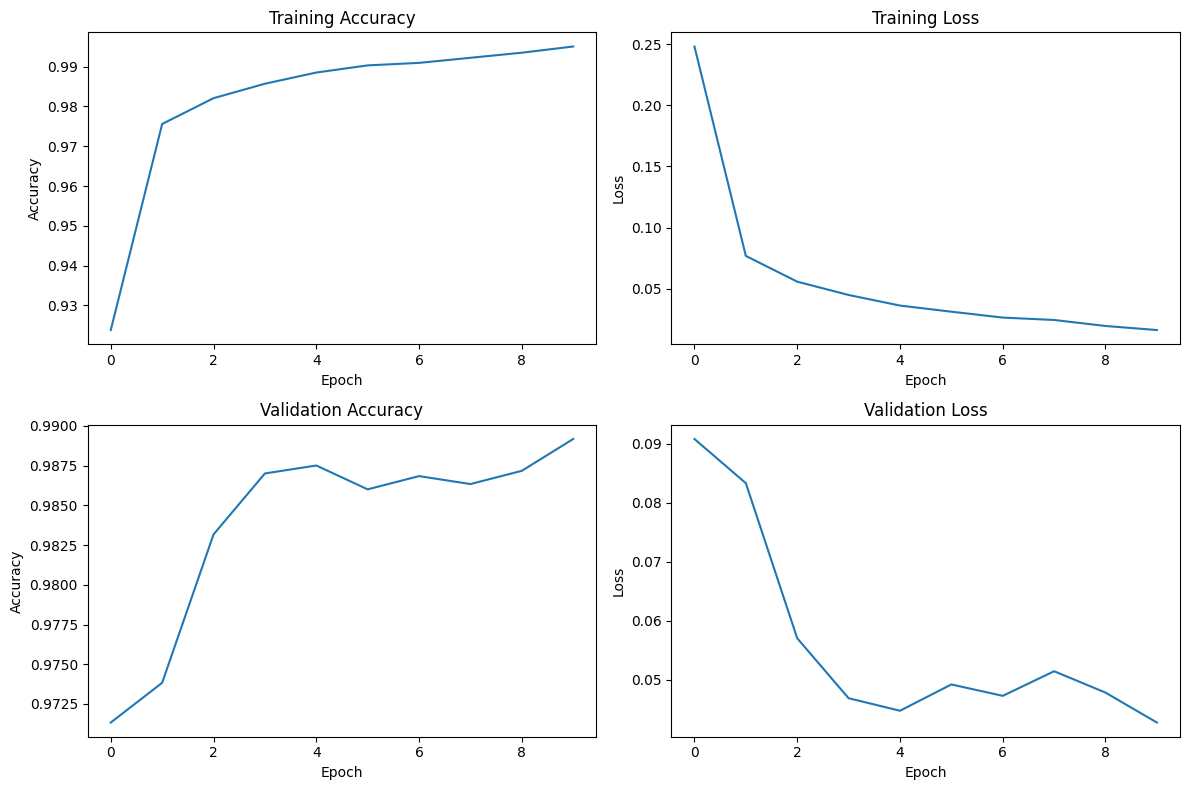

In [4]:
# Train the model with validation data
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_data=(validation_images, validation_labels))

# Visualize training plot
plt.figure(figsize=(12, 8))

# Plot training accuracy values
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot training loss values
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot validation accuracy values
plt.subplot(2, 2, 3)
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot validation loss values
plt.subplot(2, 2, 4)
plt.plot(history.history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.tight_layout()
plt.show()

## Probando el modelo
El modelo entrenado se evalúa en el conjunto de datos de prueba para evaluar su rendimiento en datos no vistos. Se calculan la precisión y la pérdida de las pruebas, y se genera un informe de clasificación para analizar en detalle el rendimiento del modelo.

In [5]:
# Testing the model on test data
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)

print(f"Test Accuracy: {test_accuracy}")
print(f"Test Loss: {test_loss}")

# Predicting labels for test images
predicted_labels = np.argmax(model.predict(test_images), axis=-1)

# Display classification report
print("Classification Report:\n", classification_report(np.argmax(test_labels, axis=-1), predicted_labels))

313/313 - 1s - 3ms/step - accuracy: 0.9892 - loss: 0.0333
Test Accuracy: 0.9891999959945679
Test Loss: 0.03333462029695511
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Conclusión
LeNet-5 revolucionó las redes neuronales convolucionales, particularmente en el reconocimiento de dígitos escritos a mano. Su aprendizaje jerárquico de características y su arquitectura eficiente allanaron el camino para las CNN modernas. A través de la implementación paso a paso, mostramos su practicidad en la clasificación de dígitos MNIST, logrando una alta precisión. El legado de LeNet-5 persiste, dando forma al panorama del aprendizaje profundo e impulsando la innovación en inteligencia artificial.